# Credit Risk Modeling: Predicting Loan Default Using Predictive Analytics and Data Mining

<h3>Introduction</h3>

<p>In this project, we aim to build a Credit Risk Model. The objective of this model is to assess the creditworthiness of loan applicants, particularly for subprime mortgages. By leveraging historical loan data, we will develop a logistic regression model to predict the likelihood of loan repayment (good loans) or default (bad loans). The model will enable the bank to make informed lending decisions, balancing profitability with risk management. </p>

<p>Key Objectives<br>
- Develop a Logistic Regression Model: Build a credit scoring model with high accuracy to predict the likelihood of loan repayment.<br>
- Risk Assessment: Implement a decile-based risk assessment to identify optimal probability thresholds for lending decisions.<br>
- Data Processing: Clean and normalize historical loan application data to ensure high data quality for model training and evaluation.</p>



# Dataset Column Descriptions

Below is a brief description of each column in the dataset:

1. **TARGET**: The target variable indicating loan status; `0` for good loans and `1` for bad loans.
2. **DerogCnt**: Number of derogatory marks on the borrower’s credit report (e.g., collections, charge-offs).
3. **CollectCnt**: Number of collection accounts in the borrower’s credit history.
4. **BanruptcyInd**: Indicator of whether the borrower has filed for bankruptcy (`1` if yes, `0` otherwise).
5. **InqCnt06**: Number of credit inquiries made in the last 6 months.
6. **InqTimeLast**: Time since the most recent credit inquiry.
7. **InqFinanceCnt24**: Number of financial-related inquiries in the last 24 months.
8. **TLTimeFirst**: Time since the first trade line (credit account) was opened.
9. **TLTimeLast**: Time since the most recent trade line was opened.
10. **TLCnt03**: Number of trade lines opened in the last 3 months.
11. **TLCnt12**: Number of trade lines opened in the last 12 months.
12. **TLCnt24**: Number of trade lines opened in the last 24 months.
13. **TLCnt**: Total number of trade lines the borrower has.
14. **TLSum**: Total sum of all trade lines (total credit limit or balances).
15. **TLMaxSum**: Maximum sum of a single trade line (highest credit limit or balance).
16. **TLSatCnt**: Number of trade lines that are currently active or satisfactory.
17. **TLDel60Cnt**: Number of trade lines delinquent for 60 days.
18. **TLBadCnt24**: Number of trade lines with bad status (e.g., default, charge-off) in the last 24 months.
19. **TL75UtilCnt**: Number of trade lines with a utilization rate above 75%.
20. **TL50UtilCnt**: Number of trade lines with a utilization rate above 50%.
21. **TLBalHCPct**: Percentage of high credit (highest balance ever recorded) relative to the total credit limit.
22. **TLSatPct**: Percentage of satisfactory trade lines out of the total trade lines.
23. **TLDel3060Cnt24**: Number of trade lines with delinquencies of 30 to 60 days in the last 24 months.
24. **TLDel90Cnt24**: Number of trade lines with delinquencies of 90 days in the last 24 months.
25. **TLDel60CntAll**: Total number of trade lines delinquent for 60 days at any point.
26. **TLOpenPct**: Percentage of trade lines that are currently open relative to the total number of trade lines.
27. **TLBadDerogCnt**: Number of trade lines with derogatory remarks such as collections or charge-offs.
28. **TLDel60Cnt24**: Number of trade lines delinquent for 60 days in the last 24 months.
29. **TLOpen24Pct**: Percentage of trade lines opened in the last 24 months out of the total number of trade lines.

### Importing Libraries





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing Dataset

In [2]:
df = pd.read_excel("a_Dataset_CreditScoring.xlsx")
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


### Data Cleaning

In [3]:
# Check the shape of the dataset (rows, columns)
df.shape

(3000, 30)

In [4]:
df.columns

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [5]:
# Drop the 'ID' column
df = df.drop('ID', axis=1)
df.shape

(3000, 29)

In [6]:
# Find missing values in the dataset
df.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [7]:
# Fill missing values with the mean of each column which preserves the overall distribution of the data,
# and doesn't introduce bias, which is especially important for maintaining the integrity of the dataset.
df = df.fillna(df.mean())

In [8]:
# Verify that there are no missing values left
df.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

### Exploratory Data Analysis

In [9]:
# Summary statistics of the dataset
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.490111,4.477536,92.813700,16.321412,0.582084,...,3.056345,0.264658,0.234603,1.163633,1.609508,3.407255,0.206618,2.460434,1.806124,0.479865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.506175,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.690400,0.526300,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.108108,5.000000,227.000000,13.000000,0.000000,...,5.000000,0.838900,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [10]:
# Count of good loans (0) and bad loans (1)
df['TARGET'].value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [11]:
# Display the percentage of good loans (0) and bad loans (1)
df['TARGET'].value_counts(normalize=True) * 100

0    83.333333
1    16.666667
Name: TARGET, dtype: float64

In [12]:
# Data summary across good loans (0) and bad loans (1)
df.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


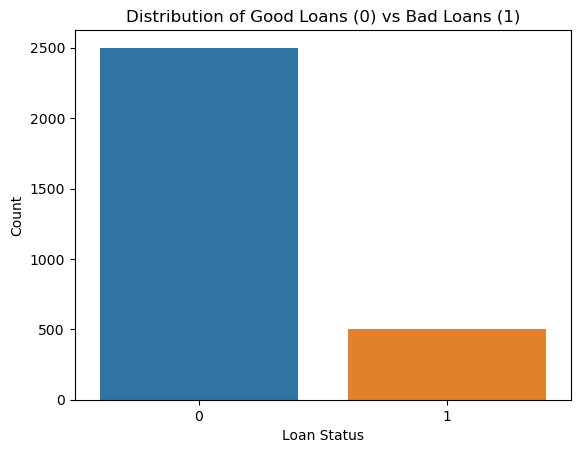

In [13]:
# Plot the distribution of the target variable
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Good Loans (0) vs Bad Loans (1)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [14]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = df.corr()['TARGET'].sort_values(key=abs, ascending=False)

# Display the top 10 most correlated features with the target variable
important_features = correlation_with_target.index[1:11]  # Skip the first one because it's the target itself
important_features

Index(['TLSatPct', 'TLDel60Cnt24', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLBadDerogCnt', 'TLDel60CntAll', 'TLDel60Cnt', 'TLBalHCPct',
       'TLBadCnt24', 'InqFinanceCnt24'],
      dtype='object')

### Train Test Split

In [15]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

In [16]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import joblib

# Export the scaler object for later use in prediction
joblib.dump(sc, 'f2_Normalisation_CreditScoring.joblib')


# # Load the saved scaler
# sc_loaded = joblib.load('f2_Normalisation_CreditScoring.joblib')

# # Transform new data with the loaded scaler
# new_data_scaled = sc_loaded.transform(new_data)

['f2_Normalisation_CreditScoring.joblib']

In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Optional: Check the class distribution after SMOTE
print("Resampled y_train distribution:", pd.Series(y_train_resampled).value_counts())


Resampled y_train distribution: 0    2000
1    2000
dtype: int64


### Justification for Applying SMOTE (Synthetic Minority Over-sampling Technique)

The original dataset exhibited a significant class imbalance, with approximately 83% of the loans classified as good loans (`0`) and only 17% as bad loans (`1`). This imbalance could lead to a biased model that predominantly predicts good loans, resulting in poor performance on detecting bad loans, which are the minority class.

To address this issue, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training dataset. SMOTE works by generating synthetic samples for the minority class (bad loans) by interpolating between existing minority class samples. This method effectively increases the number of bad loan instances in the training set, balancing the class distribution.

After applying SMOTE, the class distribution in the training set was balanced, with 2000 samples each for good loans and bad loans. This balanced dataset is crucial for training a model that can accurately distinguish between good and bad loans, thereby improving its ability to predict defaults (bad loans).

In summary, SMOTE was necessary to prevent the model from being biased towards the majority class and to enhance its predictive power for the minority class, leading to a more robust and fair credit risk model.


# Risk Model building

### Logistic Regression Model

In [20]:
# Initialize the Logistic Regression model with class_weight='balanced'
# This helps to counteract the class imbalance by adjusting weights inversely proportional to class frequencies.
model = LogisticRegression(class_weight='balanced', random_state=0)

# Train the model on the resampled data (SMOTE applied)
# The model is trained to learn from the balanced dataset to better predict both good and bad loans.
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[362 138]
 [ 32  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       500
           1       0.33      0.68      0.44       100

    accuracy                           0.72       600
   macro avg       0.62      0.70      0.63       600
weighted avg       0.82      0.72      0.75       600


Accuracy Score: 0.7166666666666667


### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)

# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[484  16]
 [ 73  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       500
           1       0.63      0.27      0.38       100

    accuracy                           0.85       600
   macro avg       0.75      0.62      0.65       600
weighted avg       0.83      0.85      0.83       600


Accuracy Score: 0.8516666666666667


In [22]:
# This saves the trained model so it can be loaded and used later for predictions on new data.
joblib.dump(rf_model, 'f1_Classifier_CreditScoring')

['f1_Classifier_CreditScoring']

### Writing output file

In [23]:
predictions = rf_model.predict_proba(X_test)
predictions

array([[0.46, 0.54],
       [0.97, 0.03],
       [0.65, 0.35],
       ...,
       [0.89, 0.11],
       [0.65, 0.35],
       [0.86, 0.14]])

In [24]:
df_prediction_prob = pd.DataFrame(predictions, columns=['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(rf_model.predict(X_test), columns=['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test, columns=['Actual Outcome'])
dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.to_csv("c1_Model_Prediction.csv", sep=',', encoding='UTF-8', index=False)
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.46,0.54,1
1,0,0.97,0.03,0
2,1,0.65,0.35,0
3,0,0.99,0.01,0
4,1,0.75,0.25,0
